In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set(color_codes=True)
import sklearn
import warnings
warnings.filterwarnings('ignore')
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Imbalanced dataset helpers
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import SMOTE

In [ ]:
pd.set_option("display.max_columns",None)
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML Project/df_cleaned.csv")
df.head()

,Unnamed: 0,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,3920,N464WN,Southwest Airlines Co.,WN,IND,BWI,515,1755,1829,34,1925,1959,34,90,90,77,32.3000,30.0000,91.5000,9.6000,30.1000,0.2300,5,4,3,9,1,2,0,0,0,32
1,1,509,N763SW,Southwest Airlines Co.,WN,IND,LAS,1591,1830,1937,67,1940,2037,57,250,240,230,64.8000,30.8000,29.4000,9.5000,27.6000,0.0000,5,4,3,9,1,10,0,0,0,47
2,2,1333,N334SW,Southwest Airlines Co.,WN,IND,MCO,828,1510,1644,94,1725,1845,80,135,121,107,71.2000,61.4000,73.4000,5.2000,30.0000,0.0000,5,4,3,9,1,8,0,0,0,72
3,3,675,N286WN,Southwest Airlines Co.,WN,IND,PHX,1489,1425,1452,27,1625,1640,15,240,228,213,66.4000,46.0000,49.5000,6.1000,28.8000,0.0000,5,4,3,9,1,3,0,0,0,12
4,4,4,N674AA,Southwest Airlines Co.,WN,IND,TPA,838,1255,1323,28,1510,1526,16,135,123,110,71.3000,62.8000,75.5000,4.6000,30.1000,0.0000,5,4,3,9,1,0,0,0,0,16


In [ ]:
df.shape

(437902, 33)

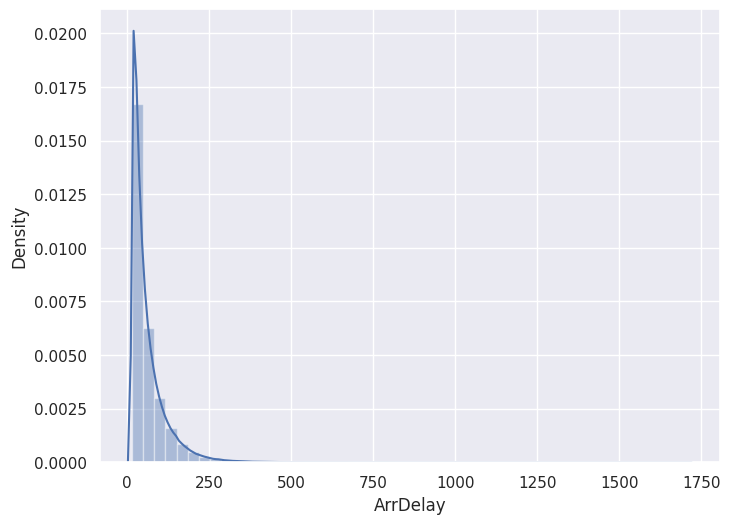

In [ ]:
sns.distplot(df['ArrDelay'])

In [ ]:
df.dtypes

Unnamed: 0             int64
FlightNum              int64
TailNum               object
Airline               object
UniqueCarrier         object
Origin                object
Dest                  object
Distance               int64
CRSDepTime             int64
DepTime                int64
DepDelay               int64
CRSArrTime             int64
ArrTime                int64
ArrDelay               int64
CRSElapsedTime         int64
ActualElapsedTime      int64
AirTime                int64
Temp_avg             float64
Dew_avg              float64
Hum_avg              float64
Wind_avg             float64
Pres_avg             float64
Precipitation        float64
Date_day               int64
Date_weekday           int64
Date_month             int64
Date_week              int64
Date_quarter           int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [ ]:
df[df['WeatherDelay'] > 0]

,Unnamed: 0,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
190,210,646,N738CB,Southwest Airlines Co.,WN,LAX,SFO,337,1805,2008,123,1930,2139,129,85,91,70,50.1000,41.5000,72.5000,3.2000,30.0000,0.0000,5,4,3,9,1,0,24,6,0,99
198,218,1113,N731SA,Southwest Airlines Co.,WN,LAX,SJC,308,2035,2140,65,2140,2249,69,65,69,54,51.5000,43.6000,75.3000,1.9000,30.0000,0.0000,5,4,3,9,1,0,12,4,0,53
314,346,950,N750SA,Southwest Airlines Co.,WN,MDW,CMH,284,615,637,22,815,838,23,60,61,49,33.9000,25.2000,71.1000,7.3000,29.2000,0.1500,5,4,3,9,1,0,22,1,0,0
325,367,3760,N672SW,Southwest Airlines Co.,WN,MDW,IAD,577,640,647,7,915,931,16,95,104,84,33.4000,28.8000,83.5000,6.5000,29.9000,0.1700,5,4,3,9,1,0,7,9,0,0
336,378,891,N400WN,Southwest Airlines Co.,WN,MDW,LAS,1521,615,650,35,815,840,25,240,230,216,64.8000,30.8000,29.4000,9.5000,27.6000,0.0000,5,4,3,9,1,0,25,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437866,492533,1487,N423AA,American Airlines Inc.,AA,STL,DFW,551,1755,1847,52,1945,2031,46,110,104,84,77.0000,54.3000,48.4000,6.5000,23.3000,0.0000,4,3,6,24,2,0,46,0,0,0
437870,492537,1487,N4WKAA,American Airlines Inc.,AA,STL,DFW,551,1755,1844,49,1945,2137,112,110,173,103,83.3000,68.5000,62.7000,8.8000,29.4000,0.0000,5,4,6,26,2,0,49,63,0,0
437883,492559,1492,N3CBAA,American Airlines Inc.,AA,MSY,MIA,674,1300,1337,37,1555,1624,29,115,107,93,83.7000,73.3000,71.1000,4.7000,30.1000,0.7800,7,6,6,26,2,0,3,0,0,26
437887,492563,1494,N547AA,American Airlines Inc.,AA,DFW,FLL,1119,1245,1424,99,1640,1854,134,175,210,158,77.5000,73.2000,86.6000,10.1000,30.0000,1.1200,1,0,6,25,2,0,79,35,0,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437902 entries, 0 to 437901
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         437902 non-null  int64  
 1   FlightNum          437902 non-null  int64  
 2   TailNum            437902 non-null  object 
 3   Airline            437902 non-null  object 
 4   UniqueCarrier      437902 non-null  object 
 5   Origin             437902 non-null  object 
 6   Dest               437902 non-null  object 
 7   Distance           437902 non-null  int64  
 8   CRSDepTime         437902 non-null  int64  
 9   DepTime            437902 non-null  int64  
 10  DepDelay           437902 non-null  int64  
 11  CRSArrTime         437902 non-null  int64  
 12  ArrTime            437902 non-null  int64  
 13  ArrDelay           437902 non-null  int64  
 14  CRSElapsedTime     437902 non-null  int64  
 15  ActualElapsedTime  437902 non-null  int64  
 16  Ai

In [ ]:
df_2=df

## Seperating Hours and Minutes for hh:mm columns

##### CRSDepTime

In [ ]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['CRSDepTime'] = df_2.CRSDepTime.map("{:04}".format)

In [ ]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['CRSDepTime'] =df_2['CRSDepTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [ ]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['CRSDepTime'] = df_2.CRSDepTime.replace(to_replace ='24:', value = '00:', regex = True)

In [ ]:
df_2['CRSDepTime_hours']= df_2['CRSDepTime'].apply(lambda x: x[0:2])

In [ ]:
df_2['CRSDepTime_minutes']=df_2['CRSDepTime'].apply(lambda x: x[3:])

In [ ]:
df_2['CRSDepTime_hours'].astype(int)
df_2['CRSDepTime_minutes'].astype(int)

0         55
1         30
2         10
3         25
4         55
          ..
437897    35
437898    35
437899    35
437900    35
437901    35
Name: CRSDepTime_minutes, Length: 437902, dtype: int64

##### DepTime

In [ ]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['DepTime'] = df_2.DepTime.map("{:04}".format)

In [ ]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['DepTime'] =df_2['DepTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [ ]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['DepTime'] = df_2.DepTime.replace(to_replace ='24:', value = '00:', regex = True)

In [ ]:
df_2['DepTime_hours']= df_2['DepTime'].apply(lambda x: x[0:2])

In [ ]:
df_2['DepTime_minutes']=df_2['DepTime'].apply(lambda x: x[3:])

In [ ]:
df_2['DepTime_hours'].astype(int)
df_2['DepTime_minutes'].astype(int)

0         29
1         37
2         44
3         52
4         23
          ..
437897     9
437898    16
437899    17
437900     7
437901     8
Name: DepTime_minutes, Length: 437902, dtype: int64

##### CRSArrTime

In [ ]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['CRSArrTime'] = df_2.CRSArrTime.map("{:04}".format)

In [ ]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['CRSArrTime'] =df_2['CRSArrTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [ ]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['CRSArrTime'] = df_2.CRSArrTime.replace(to_replace ='24:', value = '00:', regex = True)

In [ ]:
df_2['CRSArrTime_hours']= df_2['CRSArrTime'].apply(lambda x: x[0:2])

In [ ]:
df_2['CRSArrTime_minutes']=df_2['CRSArrTime'].apply(lambda x: x[3:])

In [ ]:
df_2['CRSArrTime_hours'].astype(int)
df_2['CRSArrTime_minutes'].astype(int)

0         25
1         40
2         25
3         25
4         10
          ..
437897    15
437898    15
437899    15
437900    15
437901    15
Name: CRSArrTime_minutes, Length: 437902, dtype: int64

##### ArrTime

In [ ]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df_2['ArrTime'] = df_2.ArrTime.map("{:04}".format)

In [ ]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df_2['ArrTime'] =df_2['ArrTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)

In [ ]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df_2['ArrTime'] = df_2.ArrTime.replace(to_replace ='24:', value = '00:', regex = True)

In [ ]:
df_2['ArrTime_hours']= df_2['ArrTime'].apply(lambda x: x[0:2])

In [ ]:
df_2['ArrTime_minutes']=df_2['ArrTime'].apply(lambda x: x[3:])

In [ ]:
df_2['ArrTime_hours'].astype(int)
df_2['ArrTime_minutes'].astype(int)

0         59
1         37
2         45
3         40
4         26
          ..
437897    42
437898    54
437899     2
437900    41
437901    33
Name: ArrTime_minutes, Length: 437902, dtype: int64

# Converting WeatherDelays into 1 and 0

In [ ]:
df_2['WeatherDelay']=df_2['WeatherDelay'].apply(lambda x: 1 if x != 0 else 0 )

In [ ]:
df_2.head()

,Unnamed: 0,FlightNum,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSDepTime,DepTime,DepDelay,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes,ArrTime_hours,ArrTime_minutes
0,0,3920,N464WN,Southwest Airlines Co.,WN,IND,BWI,515,17:55,18:29,34,19:25,19:59,34,90,90,77,32.3000,30.0000,91.5000,9.6000,30.1000,0.2300,5,4,3,9,1,2,0,0,0,32,17,55,18,29,19,25,19,59
1,1,509,N763SW,Southwest Airlines Co.,WN,IND,LAS,1591,18:30,19:37,67,19:40,20:37,57,250,240,230,64.8000,30.8000,29.4000,9.5000,27.6000,0.0000,5,4,3,9,1,10,0,0,0,47,18,30,19,37,19,40,20,37
2,2,1333,N334SW,Southwest Airlines Co.,WN,IND,MCO,828,15:10,16:44,94,17:25,18:45,80,135,121,107,71.2000,61.4000,73.4000,5.2000,30.0000,0.0000,5,4,3,9,1,8,0,0,0,72,15,10,16,44,17,25,18,45
3,3,675,N286WN,Southwest Airlines Co.,WN,IND,PHX,1489,14:25,14:52,27,16:25,16:40,15,240,228,213,66.4000,46.0000,49.5000,6.1000,28.8000,0.0000,5,4,3,9,1,3,0,0,0,12,14,25,14,52,16,25,16,40
4,4,4,N674AA,Southwest Airlines Co.,WN,IND,TPA,838,12:55,13:23,28,15:10,15:26,16,135,123,110,71.3000,62.8000,75.5000,4.6000,30.1000,0.0000,5,4,3,9,1,0,0,0,0,16,12,55,13,23,15,10,15,26


In [ ]:
df_3 = df_2.drop(['Unnamed: 0','CarrierDelay','NASDelay','SecurityDelay','LateAircraftDelay',
           'CRSDepTime', 'DepTime', 'DepDelay', 'CRSArrTime','ArrTime', 'ArrDelay','FlightNum','ArrTime_hours','ArrTime_minutes'],
          axis=1)

In [ ]:
df_3 = df_3[['TailNum', 'Airline', 'UniqueCarrier', 'Origin', 'Dest',
       'Distance', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Pres_avg',
       'Precipitation', 'Date_day', 'Date_weekday', 'Date_month', 'Date_week',
       'Date_quarter', 'CRSDepTime_hours','CRSDepTime_minutes', 'DepTime_hours', 'DepTime_minutes',
       'CRSArrTime_hours', 'CRSArrTime_minutes', 'WeatherDelay']]

In [ ]:
df_3['CRSDepTime_hours'] = df_3['CRSDepTime_hours'].astype(int)
df_3['CRSDepTime_minutes'] = df_3['CRSDepTime_minutes'].astype(int)
df_3['DepTime_hours'] = df_3['DepTime_hours'].astype(int)
df_3['DepTime_minutes'] = df_3['DepTime_minutes'].astype(int)
df_3['CRSArrTime_hours'] = df_3['CRSArrTime_hours'].astype(int)
df_3['CRSArrTime_minutes'] = df_3['CRSArrTime_minutes'].astype(int)
# df_3['ArrTime_hours'] = df_3['ArrTime_hours'].astype(int)
# df_3['ArrTime_minutes'] = df_3['ArrTime_minutes'].astype(int)

In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437902 entries, 0 to 437901
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TailNum             437902 non-null  object 
 1   Airline             437902 non-null  object 
 2   UniqueCarrier       437902 non-null  object 
 3   Origin              437902 non-null  object 
 4   Dest                437902 non-null  object 
 5   Distance            437902 non-null  int64  
 6   CRSElapsedTime      437902 non-null  int64  
 7   ActualElapsedTime   437902 non-null  int64  
 8   AirTime             437902 non-null  int64  
 9   Temp_avg            437902 non-null  float64
 10  Dew_avg             437902 non-null  float64
 11  Hum_avg             437902 non-null  float64
 12  Wind_avg            437902 non-null  float64
 13  Pres_avg            437902 non-null  float64
 14  Precipitation       437902 non-null  float64
 15  Date_day            437902 non-nul

In [ ]:
# encode categorical data into numeric values
labelEncoder = LabelEncoder()
df_3["Origin"] = labelEncoder.fit_transform(df_3["Origin"])
df_3["Dest"] = labelEncoder.fit_transform(df_3["Dest"])
df_3["TailNum"] = labelEncoder.fit_transform(df_3["TailNum"])
df_3["Airline"] = labelEncoder.fit_transform(df_3["Airline"])
df_3["UniqueCarrier"] = labelEncoder.fit_transform(df_3["UniqueCarrier"])


categorical = ['Date_day','Date_month','Date_quarter','Date_week','Date_weekday','TailNum','Airline','UniqueCarrier','Origin','Dest','CRSDepTime_minutes', 'DepTime_hours', 
               'DepTime_minutes','CRSElapsedTime', 'ActualElapsedTime', 'AirTime','CRSArrTime_hours', 'CRSArrTime_minutes']
              #  , 'ArrTime_hours','ArrTime_minutes']
numeric = ['Temp_avg','Dew_avg','Hum_avg','Wind_avg','Pres_avg','Precipitation','Distance']
target = df_3['WeatherDelay']


Feature Selection

In [ ]:
X = df_3.loc[:, df_3.columns != "WeatherDelay"]
y = np.array(df_3.loc[:, df_3.columns == "WeatherDelay"]["WeatherDelay"])

model = RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)
importances = model.feature_importances_
importances

array([0.06090646, 0.02924331, 0.01896707, 0.05232059, 0.03084481,
       0.0425875 , 0.04310295, 0.06658414, 0.05456132, 0.05025781,
       0.04997932, 0.05010777, 0.04832239, 0.03325259, 0.02037686,
       0.02541128, 0.02590926, 0.01989741, 0.04049016, 0.00683775,
       0.03311785, 0.03498485, 0.03946007, 0.05164363, 0.03183837,
       0.03899451])

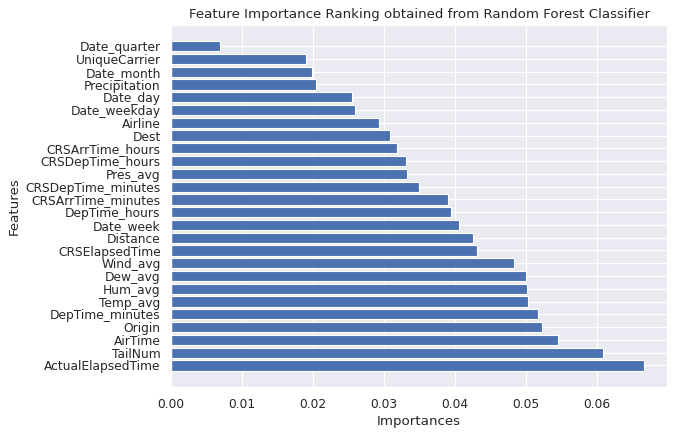

In [ ]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6), dpi=80)
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
#plt.savefig("Img/05_04_Feature_Importances_RFC.png")
del importances
del model
del X
del y


## Plot to show Imbalance of Data

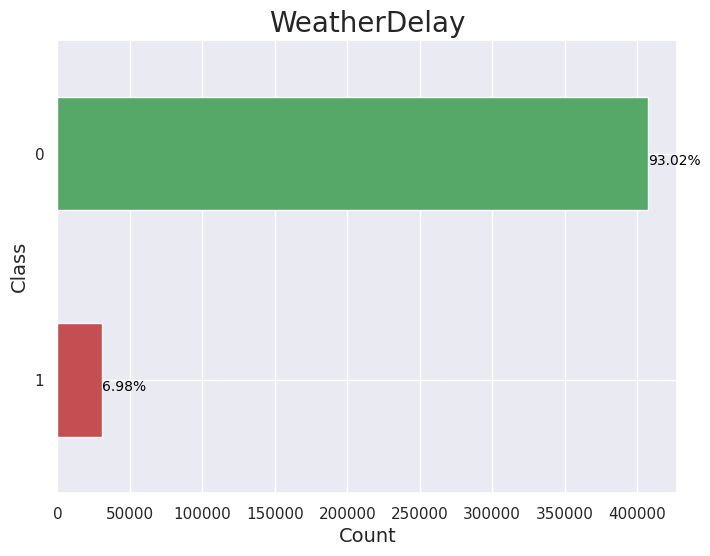

0    407352
1     30550
Name: WeatherDelay, dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
ax = df_3['WeatherDelay'].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("WeatherDelay", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df_3['WeatherDelay'].value_counts())
fig = ax.get_figure()


### Data Splitting,

In [ ]:
X = df_3.loc[:, df_3.columns != "WeatherDelay"]
y = np.asarray(df_3["WeatherDelay"])

print(f"\nDataset shape: {df_3.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")
print(f"{X_train.shape[1]} X: {X_train.columns.to_list()}")


Dataset shape: (437902, 27)
X_train shape: (306531, 26) | X_test shape: (131371, 26)
y_train shape: (306531,) | y_test shape: (131371,)
26 X: ['TailNum', 'Airline', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Pres_avg', 'Precipitation', 'Date_day', 'Date_weekday', 'Date_month', 'Date_week', 'Date_quarter', 'CRSDepTime_hours', 'CRSDepTime_minutes', 'DepTime_hours', 'DepTime_minutes', 'CRSArrTime_hours', 'CRSArrTime_minutes']


### Random Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=42)
# smote = SMOTE(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

Balancing the Training Data

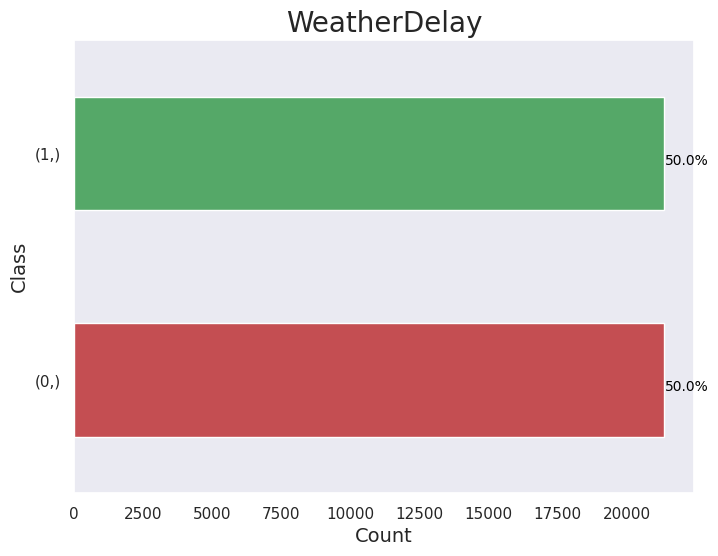

0    21369
1    21369
dtype: int64


In [ ]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(y_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("WeatherDelay", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(y_train).value_counts())
fig = ax.get_figure()

Scaling for Logistic,KNN,SVM

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Run the Logistic Regression Model: 
## (a) Define function, train the model. Report coefficient.
logreg = LogisticRegression() 
# if no penalization:
logreg_nopenal = LogisticRegression(penalty = 'none')
logreg.fit(X_train_scaled, y_train)
logreg.coef_, logreg.intercept_

## (b) Accuracy
print("Accuracy for test set is:", logreg.score(X_test_scaled, y_test))

# # Get it manually
y_test_pred = logreg.predict(X_test_scaled)

# # Correct prediction?
# Acc_Manual = np.sum(y_test_pred == y_test)/y_test.shape 
# Acc_Manual


Accuracy for test set is: 0.6387635018383052


In [ ]:
joblib.dump(logreg, "LogisticRegression.joblib")

['LogisticRegression.joblib']

Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
logreg_matrix = confusion_matrix(y_test, y_test_pred)
logreg_matrix

array([[78251, 43939],
       [ 3517,  5664]])

In [ ]:
print("TP is:", logreg_matrix[1, 1])
print("TN is:", logreg_matrix[0, 0])
print("FP is:", logreg_matrix[0, 1])
print("FN is:", logreg_matrix[1, 0])

TP is: 5664
TN is: 78251
FP is: 43939
FN is: 3517


In [ ]:
#  Additional Performance Measures
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.11418664193697962
Recall score: 0.616926260755909
Accuracy score: 0.6387635018383052
F1 score: 0.19270549809471968


Text(0, 0.5, 'Precision')

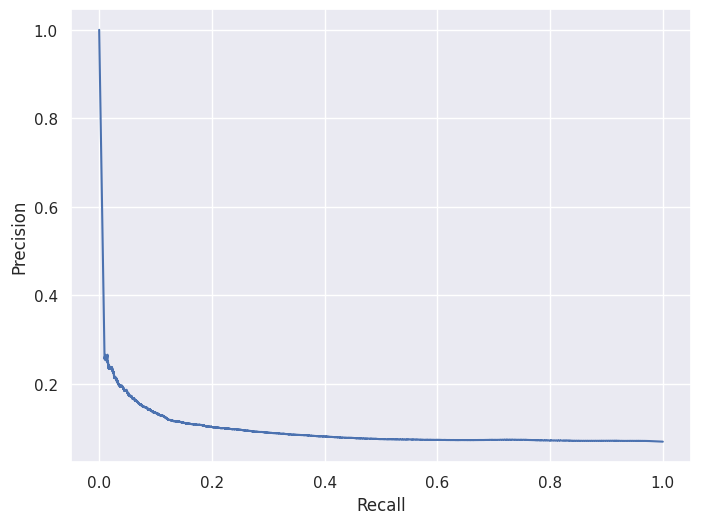

In [ ]:
# Practice 1: Here we plot the Precision-Recall Curve

from sklearn.metrics import precision_recall_curve
# S1. Get probability
logreg.predict_proba(X_test)  # 1 - pihat, pihat
prob_test = logreg.predict_proba(X_test)[:, 1]
# S2. Collect Necessary Measures
precision, recall, thred = precision_recall_curve(y_test, prob_test)
# S3. Plot Figure
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [ ]:
from sklearn.metrics import roc_auc_score
# we have obtained the predicted probability in the previous step: y_pred_proba

print("AUC for logistic regression:", roc_auc_score(y_test, prob_test)  )

AUC for logistic regression: 0.5446667612267527


Text(0, 0.5, 'TPR')

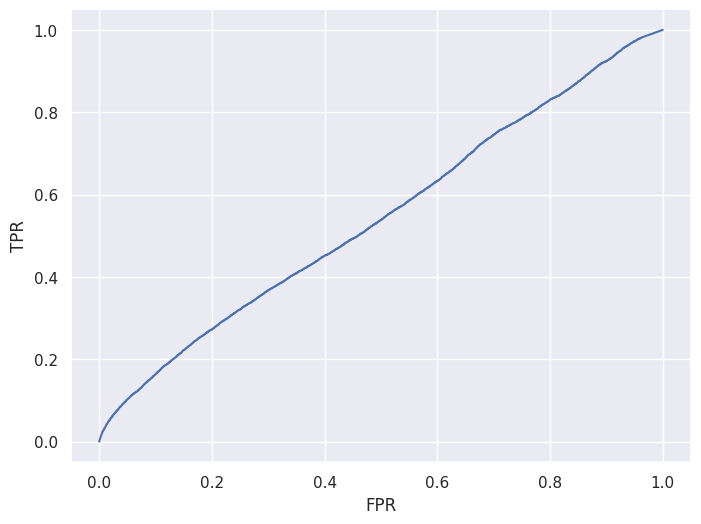

In [ ]:
# Practice 2: Similar to ROC Curve

from sklearn.metrics import roc_curve

# Predicted Probability: prob_test
# Get Measures
fpr, tpr, thred_roc = roc_curve(y_test, prob_test)

# Generate Figure
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

K-Nearest Neighbor

In [ ]:
# Train a k-NN model with k = 3
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train_scaled, y_train)

knn.score(X_test_scaled, y_test)

0.7659376879219919

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier

# # define function
# knn = KNeighborsClassifier(n_jobs=8)
# # define a list of parameters
# param_knn = {'n_neighbors': [2]}  # exactly the same as the input variable name. 
# # range(i, j) from i to j not including j
# # range(i, j, s): from i to j not including j, increase by s
# #apply grid search
# grid_knn = GridSearchCV(knn, param_knn, cv = 4)
# grid_knn.fit(X_train, y_train)
# # the best hyperparameter chosen:
# print("Best k is:", grid_knn.best_params_)
# # When k=25 (best case), the validation score of through CV is:
# print("Mean validation score is:", grid_knn.best_score_)

Best k is: {'n_neighbors': 2}
Mean validation score is: 0.5657963346412804


### Ensemble Methods

Voting Classifier

In [ ]:
# S1: Define Functions/Estimators

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(kernel = 'rbf', random_state=42) 
nbg_clf = GaussianNB()

In [ ]:
# S2: Apply Voting Classifier

from sklearn.ensemble import VotingClassifier

# define voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr1', log_clf), ('svc', svm_clf), ('nbg', nbg_clf)],
    voting='hard',)

# train the model
# voting_clf.fit(X_train, y_train)

# Performance Measure
# print("Test score for voting classifier is:", voting_clf.score(X_test, y_test))

for clf in (log_clf, nbg_clf, svm_clf, voting_clf):
    clf.fit(X_train_scaled, y_train)
    print(clf.__class__.__name__, clf.score(X_test_scaled, y_test))

LogisticRegression 0.6387635018383052
GaussianNB 0.5677204253602394
SVC 0.6758340881929802
VotingClassifier 0.6333132883208623


SVC

In [ ]:
from sklearn.svm import SVC

kernel_svc = SVC(random_state=0) #rbf kernel(gamma auto determined),C =1

kernel_svc.fit(X_train,y_train)
kernel_svc.score(X_test,y_test)

0.6528076972847889

Bagging Ensemble

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)

bag_clf = BaggingClassifier(dt,n_estimators= 200,max_samples=100,bootstrap=True,random_state=42)

bag_clf.fit(X_train,y_train)

bag_clf.score(X_test,y_test)

0.6326891018565741

In [ ]:
nb = DecisionTreeClassifier(max_depth=1)

nb.fit(X_train,y_train)
print('Single Naive Tree:' ,nb.score(X_test,y_test))
bag_clf2 = BaggingClassifier(nb,n_estimators= 200,max_samples=100,bootstrap=True,random_state=42)

bag_clf2.fit(X_train,y_train)
print('Bagging',bag_clf2.score(X_test,y_test))

Single Naive Tree: 0.6586080641846374
Bagging 0.6346073334297524


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#mostly in random forest the hyperparameter tuning is just for max_features
rf_clf = RandomForestClassifier(n_estimators=200,max_samples=100,max_features=2,bootstrap=True,random_state=42)

rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.6236383981243958

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define base model
naive_dt = DecisionTreeClassifier(max_depth=1)

# AdaBoost
ada_clf = AdaBoostClassifier(
    naive_dt, n_estimators=200, learning_rate=0.5,
    random_state=42)

ada_clf.fit(X_train, y_train)

# Performance
print(ada_clf.score(X_test, y_test))

0.6777523197661585


LGBMClassifier

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)

# specify your configurations as a dict
params =  {'task': 'train',
 'learning_rate': 0.03,
 'num_leaves': 200,
 'colsample_bytree': 0.7739008256234834,
 'subsample': 0.8771401291549346,
 'bagging_freq': 1,
 'max_depth': -1,
 'verbosity': -1,
 'reg_alpha': 5.812082145381923e-07,
 'reg_lambda': 0.1591344852486812,
 'min_split_gain': 0.0,
 'zero_as_missing': False,
 'max_bin': 255,
 'min_data_in_bin': 3,
 'random_state': 42,
 'num_classes': 1,
 'objective': 'binary',
 'metric': 'binary_logloss',
 'num_threads': 0,
 'min_sum_hessian_in_leaf': 0.006586828415076533,
 'n_estimators': 556}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# train
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval)

gridParams = {
    'learning_rate': [ 0.1],
    'num_leaves': [63],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary']
}

mdl = lgb.LGBMClassifier(
    task = params['task'],
    metric = params['metric'],
    max_bin = params['max_bin'],
    bagging_freq = params['bagging_freq'],
    min_sum_hessian_in_leaf = params['min_sum_hessian_in_leaf'],
    n_jobs = -1
)

scoring = {'AUC': 'roc_auc'}

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, scoring=scoring, n_jobs=-1, refit='AUC')
# Run the grid
grid.fit(X_train, y_train)

print('Best parameters found by grid search are:', grid.best_params_)
print('Best score found by grid search is:', grid.best_score_)

[1]	valid_0's binary_logloss: 0.688143
[2]	valid_0's binary_logloss: 0.683617
[3]	valid_0's binary_logloss: 0.677569
[4]	valid_0's binary_logloss: 0.67233
[5]	valid_0's binary_logloss: 0.667196
[6]	valid_0's binary_logloss: 0.662183
[7]	valid_0's binary_logloss: 0.657231
[8]	valid_0's binary_logloss: 0.653458
[9]	valid_0's binary_logloss: 0.649673
[10]	valid_0's binary_logloss: 0.645758
[11]	valid_0's binary_logloss: 0.642158
[12]	valid_0's binary_logloss: 0.638137
[13]	valid_0's binary_logloss: 0.635068
[14]	valid_0's binary_logloss: 0.633116
[15]	valid_0's binary_logloss: 0.629811
[16]	valid_0's binary_logloss: 0.626213
[17]	valid_0's binary_logloss: 0.623709
[18]	valid_0's binary_logloss: 0.620908
[19]	valid_0's binary_logloss: 0.617573
[20]	valid_0's binary_logloss: 0.615116
[21]	valid_0's binary_logloss: 0.612534
[22]	valid_0's binary_logloss: 0.609662
[23]	valid_0's binary_logloss: 0.606928
[24]	valid_0's binary_logloss: 0.604492
[25]	valid_0's binary_logloss: 0.602796
[26]	valid

In [ ]:
grid = joblib.load("/content/drive/MyDrive/ML Project/LGBMClassifier.joblib")

grid.score(X_test,y_test)

0.816672807099858

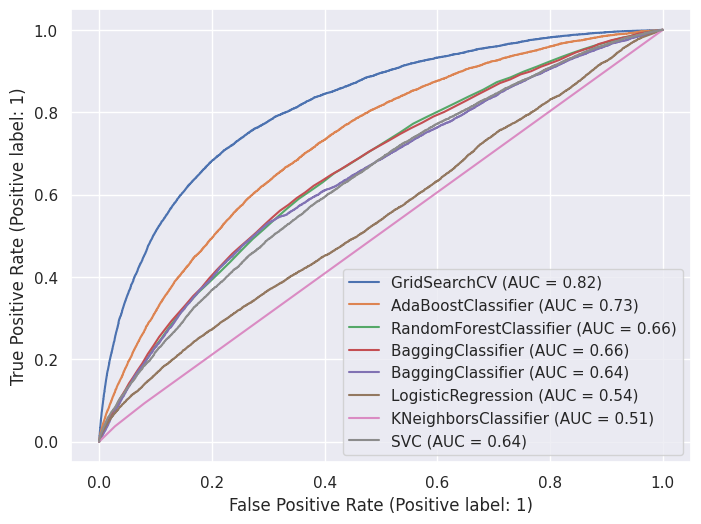

In [ ]:
from sklearn.metrics import plot_roc_curve

classifiers = [grid,ada_clf, rf_clf,bag_clf,bag_clf2,logreg,knn,kernel_svc]
ax = plt.gca()
# plt.figure(figsize=(10,10))
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

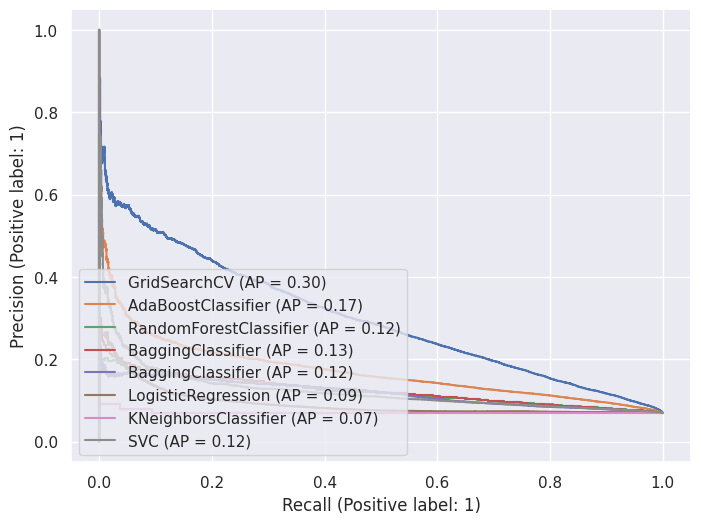

In [ ]:
from sklearn.metrics import  plot_precision_recall_curve

classifiers = [grid,ada_clf, rf_clf,bag_clf,bag_clf2,logreg,knn,kernel_svc]
ax = plt.gca()
for i in classifiers:
    plot_precision_recall_curve(i, X_test, y_test, ax=ax)

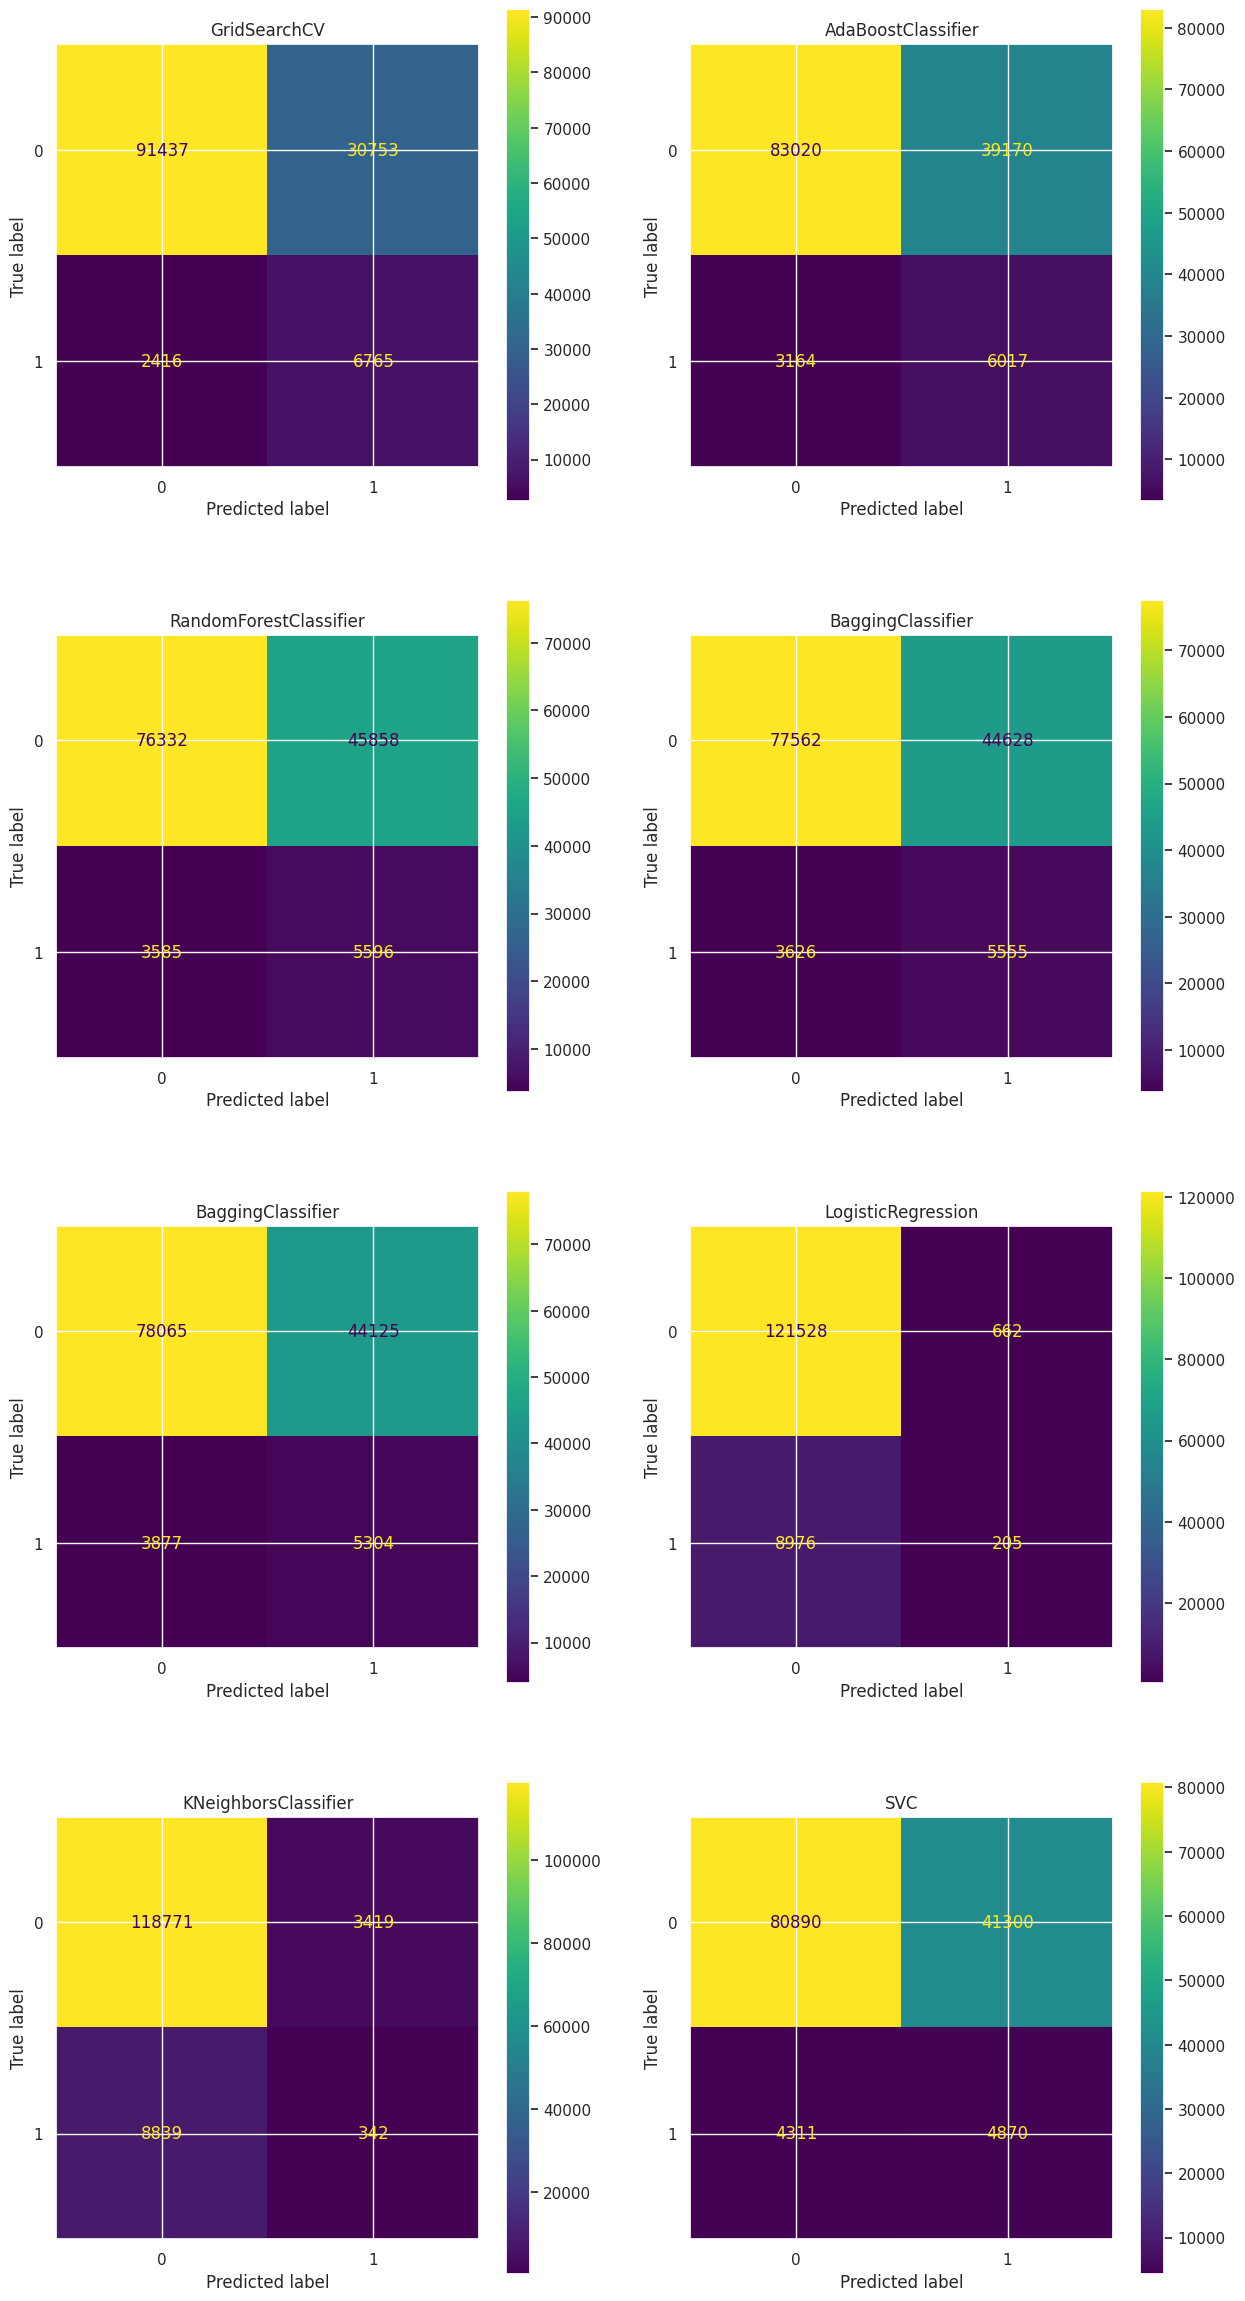

In [ ]:
from sklearn.metrics import  plot_confusion_matrix

classifiers = [grid,ada_clf, rf_clf,bag_clf,bag_clf2,logreg,knn,kernel_svc]
fig, axes = plt.subplots(4, 2, figsize=(15,30))

for classifiers, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(classifiers, 
                          X_test, 
                          y_test, 
                          ax=ax 
                          )
    ax.title.set_text(type(classifiers).__name__)

In [ ]:
joblib.dump(logreg, "/content/drive/MyDrive/ML Project/LogisticRegression.joblib")
joblib.dump(knn, "/content/drive/MyDrive/ML Project/KNeighborsClassifier.joblib")
joblib.dump(kernel_svc, "/content/drive/MyDrive/ML Project/SVC.joblib")
joblib.dump(bag_clf, "/content/drive/MyDrive/ML Project/Bagging_1.joblib")
joblib.dump(bag_clf2, "/content/drive/MyDrive/ML Project/Bagging_2.joblib")
joblib.dump(rf_clf, "/content/drive/MyDrive/ML Project/RandomForestClassifier.joblib")
joblib.dump(ada_clf, "/content/drive/MyDrive/ML Project/AdaBoostClassifier.joblib")
joblib.dump(grid, "/content/drive/MyDrive/ML Project/LGBMClassifier.joblib")

['/content/drive/MyDrive/ML Project/LGBMClassifier.joblib']

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)

# specify your configurations as a dict
params =  {'task': 'train',
 'learning_rate': 0.03,
 'num_leaves': 200,
 'colsample_bytree': 0.7739008256234834,
 'subsample': 0.8771401291549346,
 'bagging_freq': 1,
 'max_depth': -1,
 'verbosity': -1,
 'reg_alpha': 5.812082145381923e-07,
 'reg_lambda': 0.1591344852486812,
 'min_split_gain': 0.0,
 'zero_as_missing': False,
 'max_bin': 255,
 'min_data_in_bin': 3,
 'random_state': 42,
 'num_classes': 1,
 'objective': 'binary',
 'metric': 'binary_logloss',
 'num_threads': 0,
 'min_sum_hessian_in_leaf': 0.006586828415076533,
 'n_estimators': 556}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# train
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval)

gridParams = {
    'learning_rate': [ 0.1],
    'num_leaves': [63],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary']
}

mdl = lgb.LGBMRegressor(
    task = params['task'],
    metric = params['metric'],
    max_bin = params['max_bin'],
    bagging_freq = params['bagging_freq'],
    min_sum_hessian_in_leaf = params['min_sum_hessian_in_leaf'],
    n_jobs = -1
)

scoring = {'AUC': 'roc_auc'}

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=5, scoring=scoring, n_jobs=-1, refit='AUC')
# Run the grid
grid.fit(X_train, y_train)

print('Best parameters found by grid search are:', grid.best_params_)
print('Best score found by grid search is:', grid.best_score_)

Decision Tree Classifier

Extra Trees Classifier

In [ ]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier")
print(conf_mat_plot)
# plt.savefig("Img/07_08_RandomUnderSampling_ETC_Confusion_Matrix")

## SMOTE

In [ ]:
smote = SMOTE(random_state=42)
features_train, labels_train = smote.fit_resample(features_train, labels_train)

## Balancing the Training Data

In [ ]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("WeatherDelay", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())


### Logistic Regression

In [ ]:
model = LogisticRegression(n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "SMOTE/LogisticRegression.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression")
print(conf_mat_plot)
del model
del model_pred

### Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "SMOTE/DecisionTreeClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier")
print(conf_mat_plot)
del model
del model_pred

### Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier()
model.fit(features_train, labels_train)
joblib.dump(model, "SMOTE/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost)")
print(conf_mat_plot)
del model
del model_pred

### Random Forest

In [ ]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "SMOTE/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier")
print(conf_mat_plot)
del model
del model_pred

### Extra Trees Classifier

In [ ]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
joblib.dump(model, "SMOTE/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier")
print(conf_mat_plot)


## Performance Evaluation

In [ ]:
# Setup
perf_df = pd.DataFrame(columns=["classifiers", "fpr", "tpr", "auc"])

# Handling Extra Trees Classifier separately due to memory constraints
fpr, tpr, _ = roc_curve(labels_test,  model_pred)
auc = roc_auc_score(labels_test, model_pred)
# Record the results
perf_df = perf_df.append({"classifiers": "ExtraTreesClassifier",
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
del model
del model_pred

classifiers = ["LogisticRegression", "DecisionTreeClassifier", "GradientBoostingClassifier", "RandomForestClassifier"]
for clf in classifiers:
    # Load the trained classifiers
    model = joblib.load(f"SMOTE/{clf}.joblib")
    model_pred = model.predict(features_test)
    fpr, tpr, _ = roc_curve(labels_test,  model_pred)
    auc = roc_auc_score(labels_test, model_pred)
    # Record the results
    perf_df = perf_df.append({"classifiers": clf,
                                        "fpr": fpr, 
                                        "tpr": tpr, 
                                        "auc": auc}, ignore_index=True)
    del model
    del model_pred

# Set name of the classifiers as index labels
perf_df.set_index("classifiers", inplace=True)

In [ ]:
fig = plt.figure(figsize=(8,6), dpi=80)
for clf_name in perf_df.index:
    plt.plot(perf_df.loc[clf_name]["fpr"], 
             perf_df.loc[clf_name]["tpr"], 
             label="{}, AUC={:.3f}".format(clf_name, perf_df.loc[clf_name]["auc"]))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()


Verstack models

In [ ]:
!pip install verstack

In [ ]:
labels_train_series = pd.Series(y_train)
labels_test_series = pd.Series(y_test)
labels_train_series.name ='target'
labels_test_series.name ='target'

In [ ]:
from verstack import Stacker
from verstack import Multicore
worker = Multicore()

stacker = Stacker(objective = 'binary', num_auto_layers=1,metafeats=False,auto = True)
X_with_stacked_feats = stacker.fit_transform(X_train, labels_train_series)
result = worker.execute(X_with_stacked_feats)

In [ ]:
stacker

Stacker(objective: binary            
        auto: True            
        num_auto_layers: 1            
        metafeats: False            
        epochs : 200            
        gridsearch_iterations: 10            
        stacking_feats_depth: 1            
        include_X: False            
        verbose : True)

In [ ]:
X_with_stacked_feats

,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes,ArrTime_hours,ArrTime_minutes,layer_1_0,layer_1_1,layer_1_2,layer_1_3,layer_1_4,layer_1_5,layer_1_6,layer_1_7,layer_1_8,layer_1_9,layer_1_10,layer_1_11,layer_1_12,layer_1_13
0,797,9,11,89,99,806,140,138,124,46.8000,10.8000,23.8000,17.4000,28.0000,0.0000,2,1,1,4,1,11,0,11,20,13,20,13,38,0.3159,0.2911,0.3089,0.0345,0.9528,0.1760,0.4230,0.4091,0.3450,0.3653,0.3622,0.0000,0.3571,0.4418
1,277,9,11,215,100,373,80,81,60,60.6000,52.5000,75.1000,7.4000,29.7000,0.0000,7,6,4,17,2,13,15,13,35,14,35,14,56,0.1225,0.1318,0.1486,0.0200,0.0003,0.4720,0.2095,0.3115,0.3952,0.0743,0.0995,0.0000,0.1111,0.0671
2,637,9,11,174,73,279,60,62,44,75.4000,42.4000,32.2000,8.1000,27.5000,0.0000,4,3,8,31,3,20,50,21,6,21,50,22,8,0.0945,0.0519,0.0371,0.0653,0.0036,0.0274,0.2156,0.2674,0.3103,0.3184,0.2867,0.0000,0.0000,0.0943
3,2468,3,4,153,11,443,102,90,72,78.9000,60.0000,55.8000,8.0000,28.9000,0.0300,1,0,6,23,2,18,35,19,10,20,17,20,40,0.7176,0.4991,0.6455,0.0661,0.5400,0.4858,0.5189,0.6889,0.5080,0.5924,0.6904,1.0000,0.1538,0.6300
4,1580,8,8,203,168,191,64,72,54,63.3000,50.0000,63.4000,12.8000,29.9000,0.0000,2,1,6,26,2,12,0,13,17,13,4,14,29,0.2134,0.2061,0.2613,0.2682,0.9886,0.0328,0.0000,0.2913,0.3921,0.6814,0.8172,0.0000,0.0000,0.1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42733,2513,2,7,130,115,963,191,183,145,76.6000,70.8000,82.9000,13.0000,29.6000,0.0000,7,6,6,25,2,18,59,19,48,21,10,21,51,0.6278,0.6582,0.6876,0.4245,0.0125,0.4795,0.5000,0.5950,0.5906,0.6749,0.7981,1.0000,0.8500,0.5413
42734,1407,1,0,66,161,247,65,57,38,52.9000,48.6000,85.6000,5.1000,29.2000,0.0000,4,3,1,5,1,22,40,1,9,23,45,2,6,0.8436,0.8775,0.6062,0.9938,0.9052,0.5272,0.6818,0.6416,0.5633,0.5819,0.4879,0.0000,1.0000,0.6842
42735,3041,3,4,13,6,500,103,121,82,63.9000,61.1000,90.8000,7.8000,29.9000,0.1500,4,3,4,14,2,15,44,18,12,16,27,19,13,0.8646,0.8997,0.8691,0.8176,0.9939,0.9548,0.8775,0.7380,0.7081,0.7368,1.0000,1.0000,1.0000,0.9745
42736,389,8,8,46,100,86,38,47,25,60.1000,52.9000,77.6000,7.2000,29.8000,0.0000,6,5,4,17,2,14,42,14,50,15,20,15,37,0.1951,0.0733,0.1748,0.0040,0.0147,0.0212,0.4052,0.3076,0.4803,0.5127,0.3844,0.0000,0.5625,0.2017


In [ ]:
test = stacker.transform(X_test)


 * Initiating Stacker.transform

   - Predicting with layer_1 models
     . predicted with model 1
     . predicted with model 2
     . predicted with model 3
     . predicted with model 4
     . predicted with model 5
     . predicted with model 6
     . predicted with model 7
     . predicted with model 8
     . predicted with model 9
     . predicted with model 10
     . predicted with model 11
     . predicted with model 12
     . predicted with model 13
     . predicted with model 14


In [ ]:
test

,TailNum,Airline,UniqueCarrier,Origin,Dest,Distance,CRSElapsedTime,ActualElapsedTime,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes,ArrTime_hours,ArrTime_minutes,layer_1_0,layer_1_1,layer_1_2,layer_1_3,layer_1_4,layer_1_5,layer_1_6,layer_1_7,layer_1_8,layer_1_9,layer_1_10,layer_1_11,layer_1_12,layer_1_13
0,3380,5,5,65,138,992,159,155,140,63.0000,53.9000,72.6000,7.0000,30.0000,0.0000,1,0,5,22,2,8,35,8,58,10,14,10,33,0.2471,0.2637,0.2582,0.0130,0.0258,0.1800,0.3339,0.3762,0.4722,0.2948,0.2708,0.0000,0.4256,0.3784
1,510,9,11,105,112,848,125,123,107,78.1000,72.2000,82.8000,7.8000,29.9000,0.1400,4,3,8,31,3,17,45,18,29,20,50,21,32,0.2472,0.2873,0.3020,0.1126,0.0032,0.1127,0.4933,0.4389,0.3200,0.3433,0.2943,0.0000,0.3310,0.3320
2,3314,8,8,171,98,179,57,49,32,15.3000,12.6000,89.5000,9.9000,28.8000,0.0000,1,0,1,5,1,13,10,16,22,15,7,18,11,0.3145,0.2468,0.2679,0.3578,0.2521,0.3796,0.2598,0.3889,0.4186,0.3943,0.3987,0.0000,0.2323,0.2892
3,1535,1,0,171,172,1249,210,207,179,27.2000,18.5000,70.2000,8.6000,25.9000,0.0000,3,2,1,4,1,18,50,19,49,21,20,22,16,0.8626,0.9092,0.8483,0.2733,0.2895,0.2558,0.7715,0.6805,0.4678,0.6682,0.7166,0.2500,0.7558,0.8959
4,385,9,11,166,99,407,85,78,66,61.3000,41.3000,49.4000,8.6000,27.6000,0.0900,4,3,5,21,2,19,0,20,15,20,25,21,33,0.2203,0.2063,0.1956,0.1261,0.0039,0.1031,0.2569,0.3523,0.2987,0.0311,0.0000,0.0000,0.0947,0.3001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131366,3479,8,8,177,100,370,87,88,62,61.8000,54.0000,75.8000,7.8000,29.8000,0.0000,6,5,6,22,2,9,26,9,49,9,53,10,17,0.1021,0.0885,0.1092,0.0340,0.0199,0.1226,0.3514,0.3250,0.4946,0.4636,0.5148,0.0000,0.1652,0.0468
131367,1486,11,9,65,135,888,141,170,155,56.6000,39.3000,54.1000,6.4000,29.0000,0.0000,4,3,4,17,2,13,38,13,45,16,59,17,35,0.2000,0.1616,0.1914,0.1698,0.4436,0.0790,0.3645,0.3702,0.3845,0.4609,0.6224,1.0000,0.2459,0.3103
131368,188,7,2,28,97,187,75,121,53,56.9000,56.0000,96.9000,6.2000,29.9000,0.2200,6,5,5,18,2,13,15,15,15,14,30,17,16,0.3777,0.4038,0.4247,0.2774,0.1884,0.3470,0.2030,0.3743,0.7844,0.6831,0.6303,0.0000,0.5513,0.4290
131369,6,1,0,213,112,1189,180,180,149,75.3000,69.1000,82.3000,6.5000,29.9000,0.0000,6,5,5,18,2,19,5,19,42,22,5,22,42,0.1129,0.0746,0.1107,0.0820,0.1130,0.2409,0.3659,0.3775,0.4795,0.0932,0.0224,0.0000,0.2042,0.4317


In [ ]:
from verstack import FeatureSelector

FS = FeatureSelector(objective = 'classification',default_model_linear=False, auto = True)
selected_feats = FS.fit_transform(X_train, labels_train_series)

In [ ]:
selected_feats.plot

Streaming output truncated to the last 5000 lines.
[87]	valid_0's binary_logloss: 0.569438
[88]	valid_0's binary_logloss: 0.568901
[89]	valid_0's binary_logloss: 0.568469
[90]	valid_0's binary_logloss: 0.567971
[91]	valid_0's binary_logloss: 0.567544
[92]	valid_0's binary_logloss: 0.567178
[93]	valid_0's binary_logloss: 0.566854
[94]	valid_0's binary_logloss: 0.56636
[95]	valid_0's binary_logloss: 0.565972
[96]	valid_0's binary_logloss: 0.565595
[97]	valid_0's binary_logloss: 0.565264
[98]	valid_0's binary_logloss: 0.564934
[99]	valid_0's binary_logloss: 0.564591
[100]	valid_0's binary_logloss: 0.564301
[101]	valid_0's binary_logloss: 0.564009
[102]	valid_0's binary_logloss: 0.563162
[103]	valid_0's binary_logloss: 0.562917
[104]	valid_0's binary_logloss: 0.562593
[105]	valid_0's binary_logloss: 0.562245
[106]	valid_0's binary_logloss: 0.56189
[107]	valid_0's binary_logloss: 0.561642
[108]	valid_0's binary_logloss: 0.561309
[109]	valid_0's binary_logloss: 0.561087
[110]	valid_0's binar

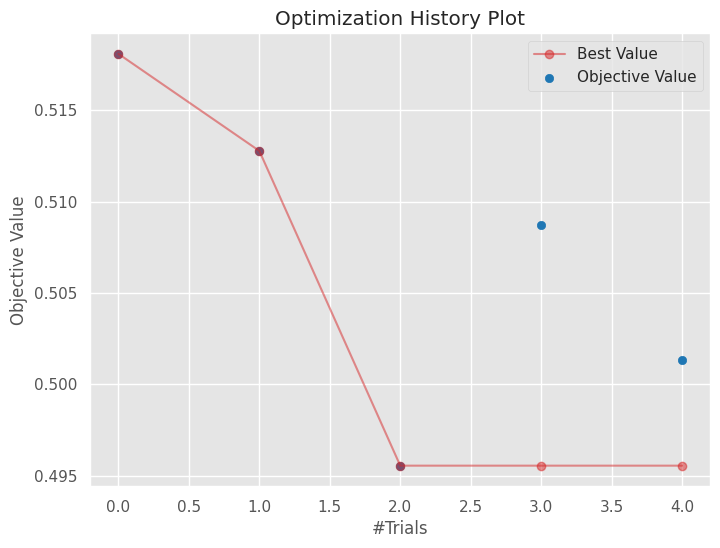

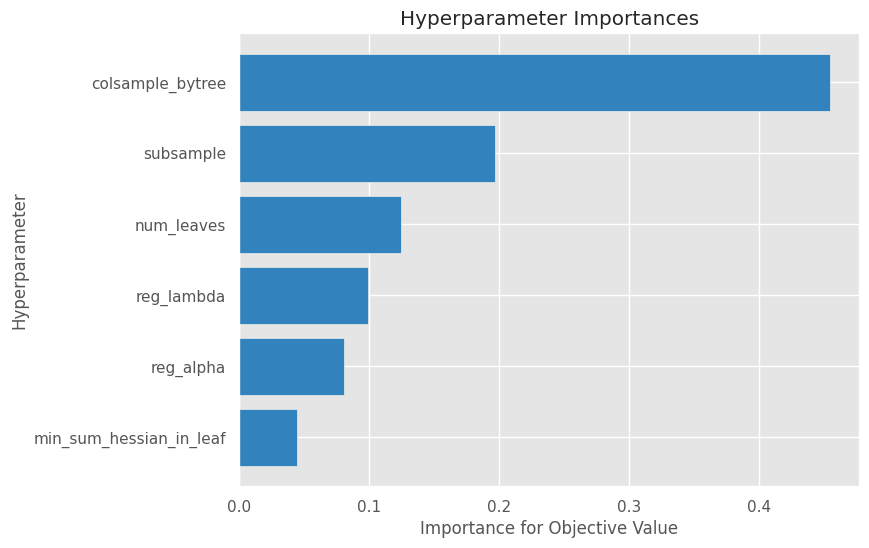

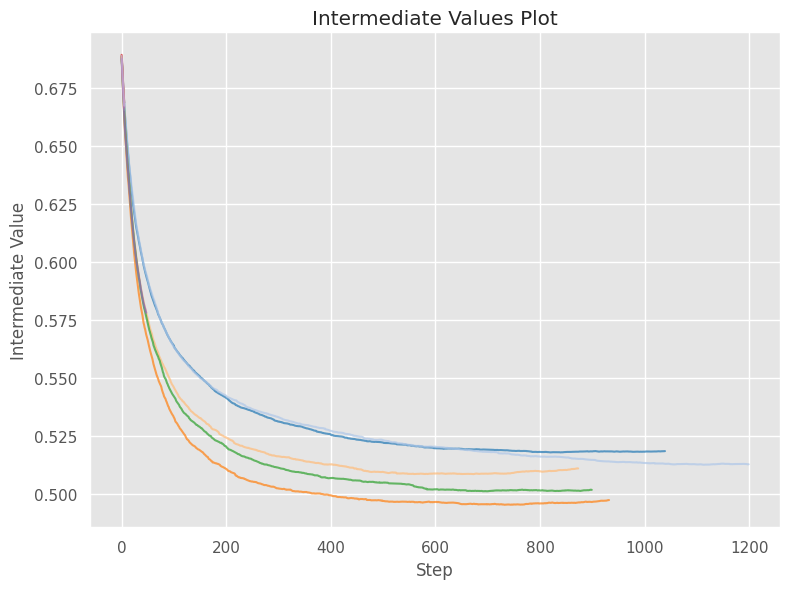

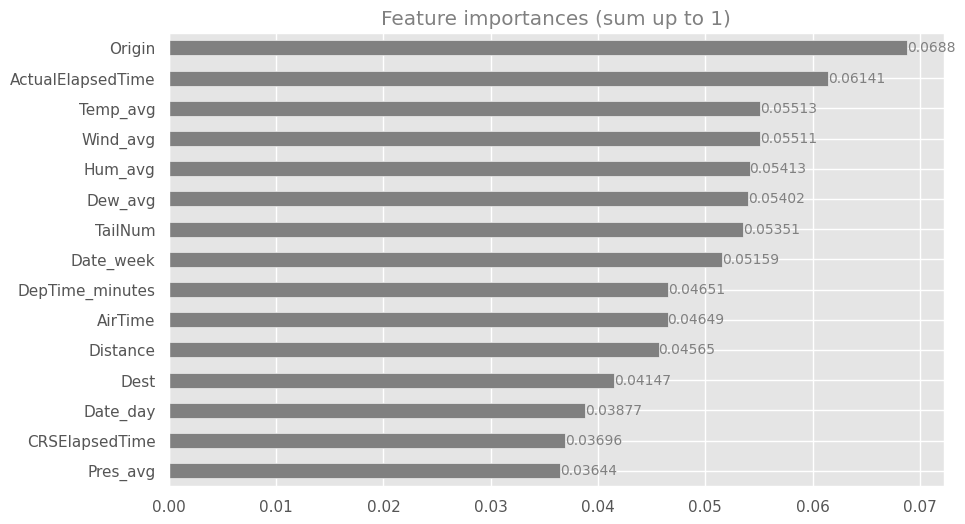


     . Optuna hyperparameters optimization finished
     .. Best trial number: 2    |     log_loss:           0.4955459325940393
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  341   |     auc:           0.8301809601508722

Time elapsed for fit execution: 2 min 12.486 sec


In [ ]:
from verstack import LGBMTuner

tuner = LGBMTuner(metric = 'auc',trials= 10, seed= 525) # <- the only required argument
tuner.fit(X_train, labels_train_series)

In [ ]:
tuner.best_params

{'task': 'train',
 'learning_rate': 0.03,
 'num_leaves': 200,
 'colsample_bytree': 0.7739008256234834,
 'subsample': 0.8771401291549346,
 'bagging_freq': 1,
 'max_depth': -1,
 'verbosity': -1,
 'reg_alpha': 5.812082145381923e-07,
 'reg_lambda': 0.1591344852486812,
 'min_split_gain': 0.0,
 'zero_as_missing': False,
 'max_bin': 255,
 'min_data_in_bin': 3,
 'random_state': 42,
 'num_classes': 1,
 'objective': 'binary',
 'metric': 'binary_logloss',
 'num_threads': 0,
 'min_sum_hessian_in_leaf': 0.006586828415076533,
 'n_estimators': 341}

In [ ]:
classification_report,

model_pred = tuner.predict(X_test)
print(confusion_matrix(y_test, model_pred))
print(classification_report(y_test, model_pred))

NameError: ignored

In [ ]:
fpr, tpr, _ = roc_curve(y_test,  model_pred)
auc = roc_auc_score(y_test, model_pred)

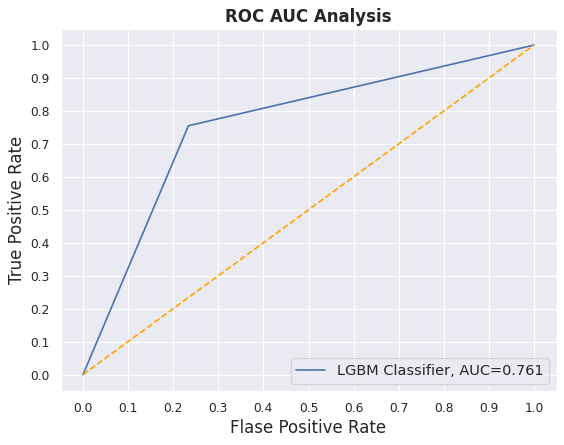

In [ ]:
fig = plt.figure(figsize=(8,6), dpi=80)
plt.plot(fpr, 
             tpr, 
             label="{}, AUC={:.3f}".format('LGBM Classifier', auc))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title("ROC AUC Analysis", fontweight="bold", fontsize=15)
plt.legend(prop={"size":13}, loc="lower right")

plt.show()


In [ ]:
!pip install verstack

Streaming output truncated to the last 5000 lines.
[871]	valid_0's rmse: 0.417017
[872]	valid_0's rmse: 0.417017
[873]	valid_0's rmse: 0.417003
[874]	valid_0's rmse: 0.41701
[875]	valid_0's rmse: 0.417013
[876]	valid_0's rmse: 0.417001
[877]	valid_0's rmse: 0.416992
[878]	valid_0's rmse: 0.416988
[879]	valid_0's rmse: 0.416978
[880]	valid_0's rmse: 0.416983
[881]	valid_0's rmse: 0.416994
[882]	valid_0's rmse: 0.417003
[883]	valid_0's rmse: 0.416997
[884]	valid_0's rmse: 0.416997
[885]	valid_0's rmse: 0.416994
[886]	valid_0's rmse: 0.416997
[887]	valid_0's rmse: 0.416984
[888]	valid_0's rmse: 0.416986
[889]	valid_0's rmse: 0.416969
[890]	valid_0's rmse: 0.416978
[891]	valid_0's rmse: 0.416987
[892]	valid_0's rmse: 0.416985
[893]	valid_0's rmse: 0.416968
[894]	valid_0's rmse: 0.416974
[895]	valid_0's rmse: 0.416973
[896]	valid_0's rmse: 0.416966
[897]	valid_0's rmse: 0.416972
[898]	valid_0's rmse: 0.416978
[899]	valid_0's rmse: 0.41697
[900]	valid_0's rmse: 0.416983
[901]	valid_0's rmse:

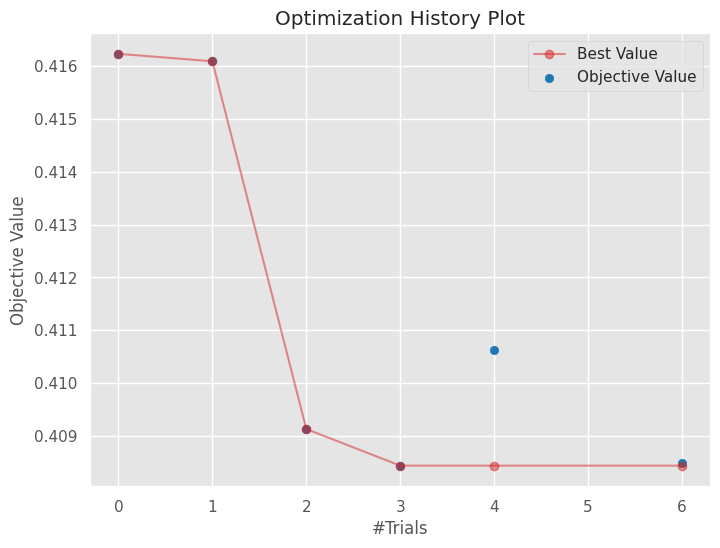

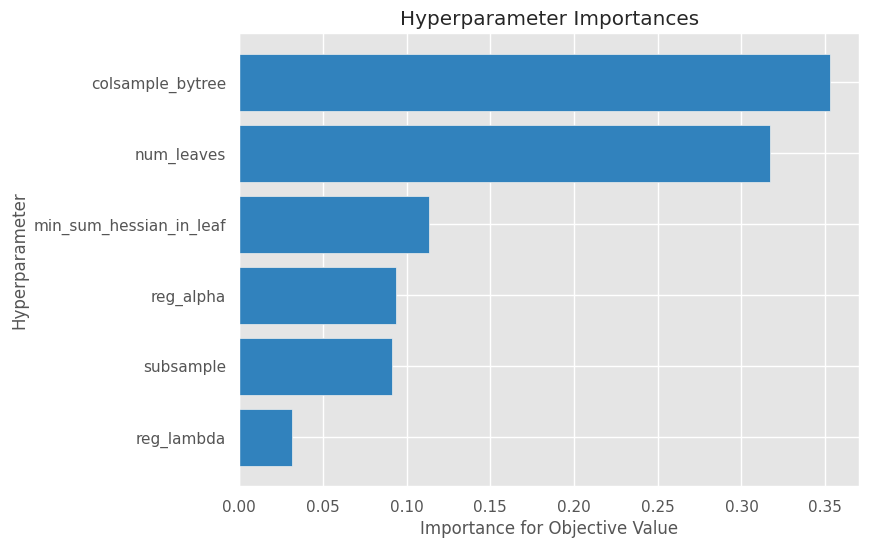

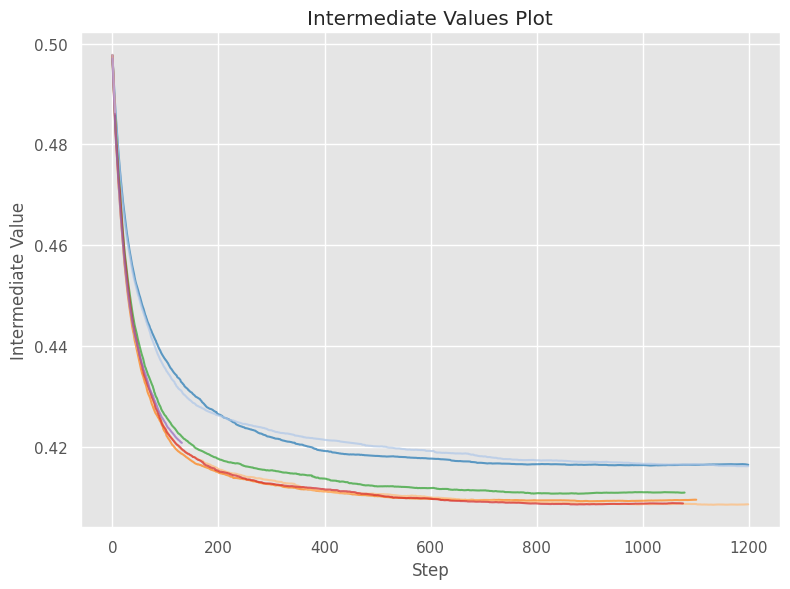

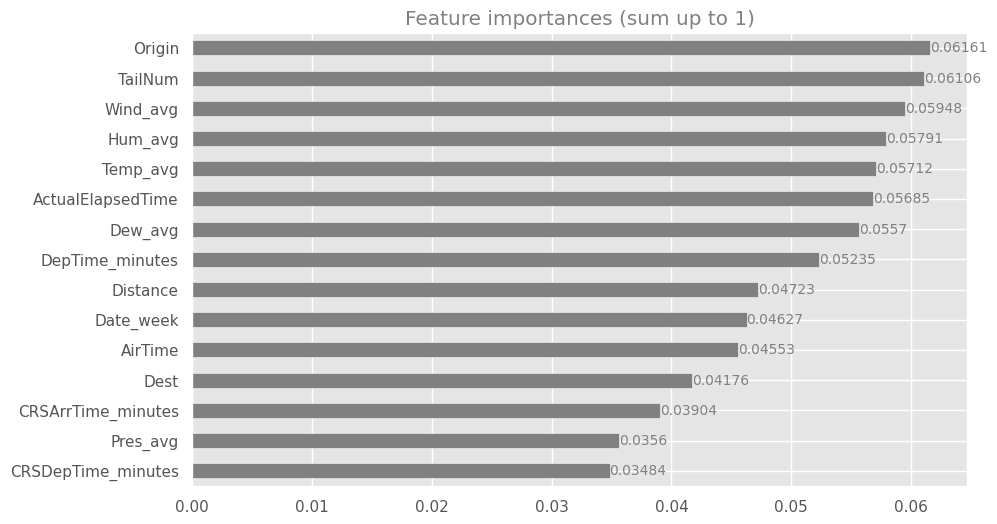


     . Optuna hyperparameters optimization finished
     .. Best trial number: 3    |     rmse:            0.408442497984347
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  731   |     rmse:          0.41173422675185684

Time elapsed for fit execution: 1 min 52.786 sec


In [ ]:
from verstack import LGBMTuner

tuner_regressor = LGBMTuner(metric = 'rmse',trials= 10,verbosity= 3, seed= 525) # <- the only required argument
tuner_regressor.fit(X_train, labels_train_series)

ArrDelay Prediction

Data Splitting for Regressor

In [ ]:
X = df_3.loc[:, df_3.columns != "WeatherDelay"]
y = np.asarray(df_2["ArrDelay"])
labels =pd.Series(y)
labels.name = 'target'
print(f"\nDataset shape: {df_3.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")
print(f"{X_train.shape[1]} X: {X_train.columns.to_list()}")


Dataset shape: (437902, 27)
X_train shape: (306531, 26) | X_test shape: (131371, 26)
y_train shape: (306531,) | y_test shape: (131371,)
26 X: ['TailNum', 'Airline', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Pres_avg', 'Precipitation', 'Date_day', 'Date_weekday', 'Date_month', 'Date_week', 'Date_quarter', 'CRSDepTime_hours', 'CRSDepTime_minutes', 'DepTime_hours', 'DepTime_minutes', 'CRSArrTime_hours', 'CRSArrTime_minutes']


In [ ]:
labels_train_series = pd.Series(y_train)
labels_test_series = pd.Series(y_test)
labels_train_series.name ='target'
labels_test_series.name ='target'

Regressor for Arr Delay

In [ ]:
from verstack import FeatureSelector

FS = FeatureSelector(objective = 'regression')
selected_feats = FS.fit_transform(X, labels)


 * Initiating FeatureSelector

   - Running feature selection with RandomForestRegressor(max_depth=2, n_estimators=50)
     . Data decreased for experiments. Working with 22.17% of data
     . Selected 18 features from 26

Time elapsed for fit_transform execution: 2 min 41.702 sec


In [ ]:
selected_feats

,AirTime,Temp_avg,Dew_avg,Hum_avg,Wind_avg,Pres_avg,Precipitation,Date_day,Date_weekday,Date_month,Date_week,Date_quarter,CRSDepTime_hours,CRSDepTime_minutes,DepTime_hours,DepTime_minutes,CRSArrTime_hours,CRSArrTime_minutes
0,77,32.3000,30.0000,91.5000,9.6000,30.1000,0.2300,5,4,3,9,1,17,55,18,29,19,25
1,230,64.8000,30.8000,29.4000,9.5000,27.6000,0.0000,5,4,3,9,1,18,30,19,37,19,40
2,107,71.2000,61.4000,73.4000,5.2000,30.0000,0.0000,5,4,3,9,1,15,10,16,44,17,25
3,213,66.4000,46.0000,49.5000,6.1000,28.8000,0.0000,5,4,3,9,1,14,25,14,52,16,25
4,110,71.3000,62.8000,75.5000,4.6000,30.1000,0.0000,5,4,3,9,1,12,55,13,23,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437897,131,76.5000,72.0000,85.9000,6.3000,29.9000,0.3700,4,3,6,24,2,15,35,16,9,19,15
437898,136,78.3000,71.0000,79.2000,6.5000,30.0000,0.8700,5,4,6,24,2,15,35,16,16,19,15
437899,141,77.3000,72.4000,85.6000,8.3000,29.9000,1.7900,1,0,6,25,2,15,35,16,17,19,15
437900,137,84.5000,73.4000,70.7000,6.8000,30.0000,0.0000,6,5,6,25,2,15,35,16,7,19,15


In [ ]:
print(f"\nDataset shape: {selected_feats.shape}")
X_train, X_test, y_train, y_test = train_test_split(selected_feats, labels, test_size=0.30, random_state=42)
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")
print(f"{X_train.shape[1]} X: {X_train.columns.to_list()}")
labels_train_series = pd.Series(y_train)
labels_test_series = pd.Series(y_test)
labels_train_series.name ='target'
labels_test_series.name ='target'


Dataset shape: (437902, 18)
X_train shape: (306531, 18) | X_test shape: (131371, 18)
y_train shape: (306531,) | y_test shape: (131371,)
18 X: ['AirTime', 'Temp_avg', 'Dew_avg', 'Hum_avg', 'Wind_avg', 'Pres_avg', 'Precipitation', 'Date_day', 'Date_weekday', 'Date_month', 'Date_week', 'Date_quarter', 'CRSDepTime_hours', 'CRSDepTime_minutes', 'DepTime_hours', 'DepTime_minutes', 'CRSArrTime_hours', 'CRSArrTime_minutes']



 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 10 trials
     .. Evaluation metric: rmse 
     .. Study direction: minimize rmse

     . Trial number: 0 finished
     .. Optimization score (lower-better): rmse: 17.752984276398468
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): rmse: 17.469461502113777
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): rmse: 18.82759088075906
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): rmse: 18.852457572256167
 ...........................................................................
     . Trial number: 4 finished
     .. Optimization score (lower-better): rmse: 19.212017920965852
 ................................................

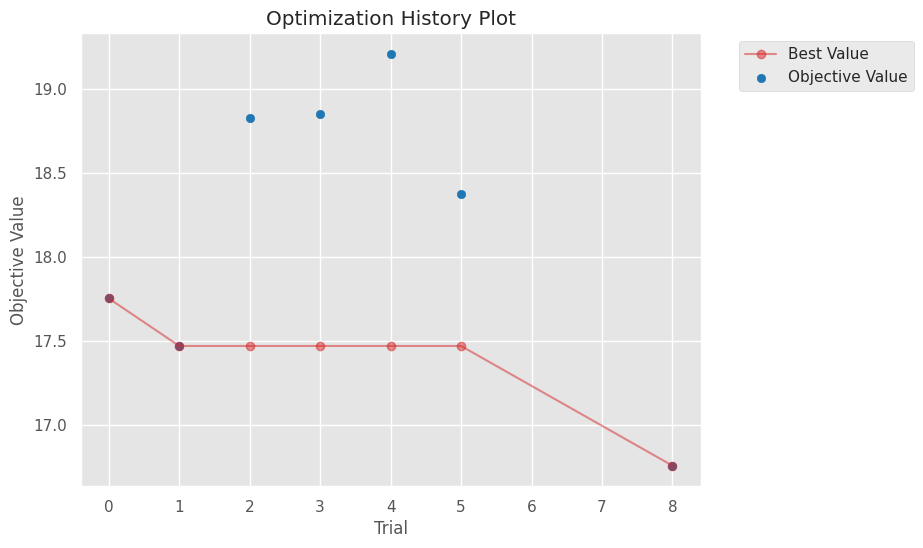

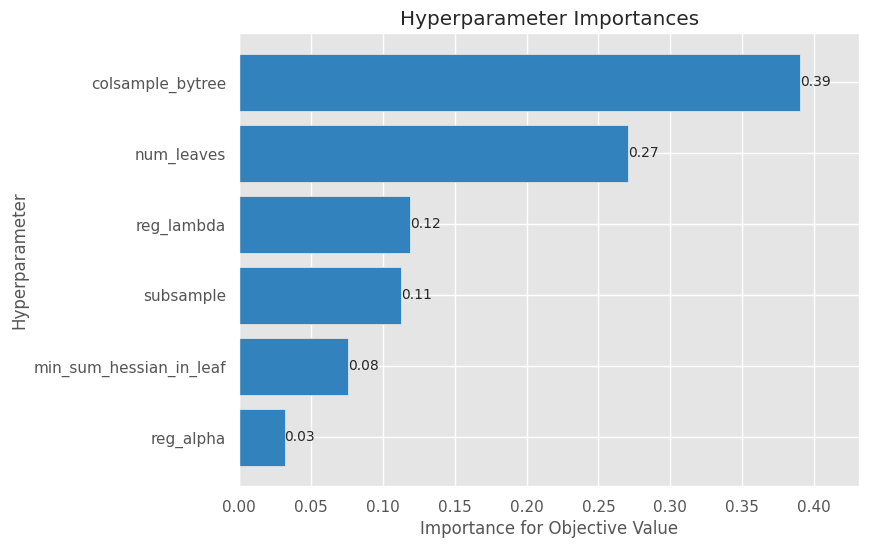

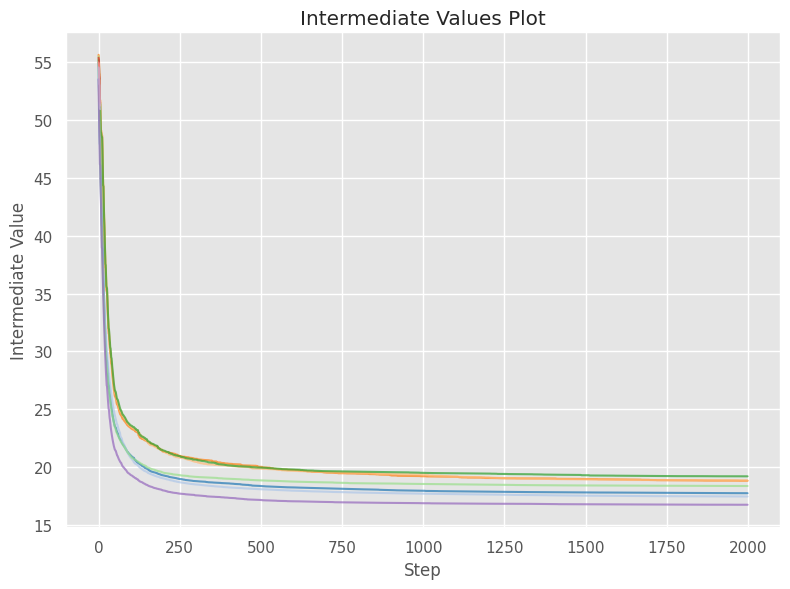

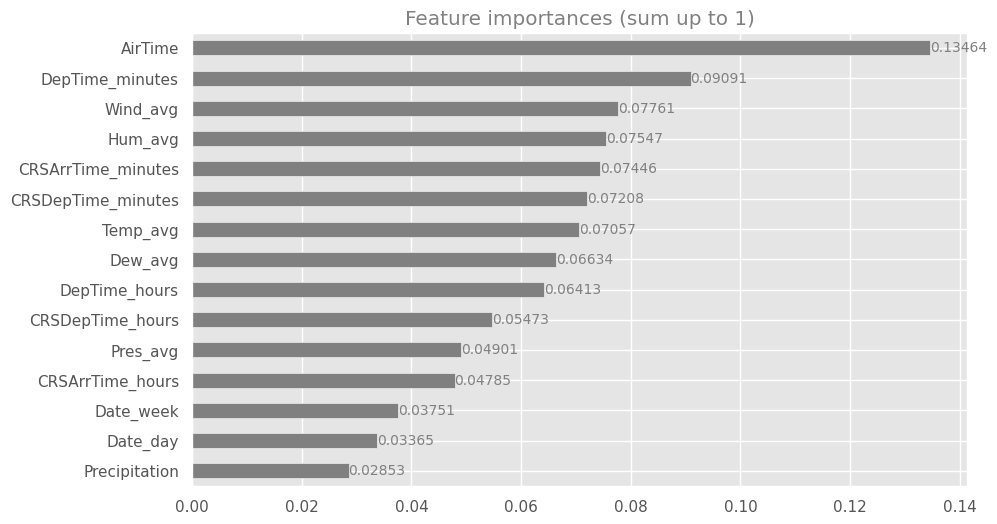


     . Optuna hyperparameters optimization finished
     .. Best trial number: 8    |     rmse:           16.755448477604443
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration: 2375   |     rmse:           18.343156306718196

Time elapsed for fit execution: 11 min 46.986 sec


In [ ]:
from verstack import LGBMTuner

tuner_regressor = LGBMTuner(metric = 'rmse',trials= 10,verbosity= 1, seed= 525) # <- the only required argument
tuner_regressor.fit(X_train, labels_train_series)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

y_pred =  tuner_regressor.predict(X_test)


In [ ]:
mean_squared_error(labels_test_series,y_pred,squared=False)

17.1233911089464

In [ ]:
r2_score(labels_test_series,y_pred)

0.9102332020643623

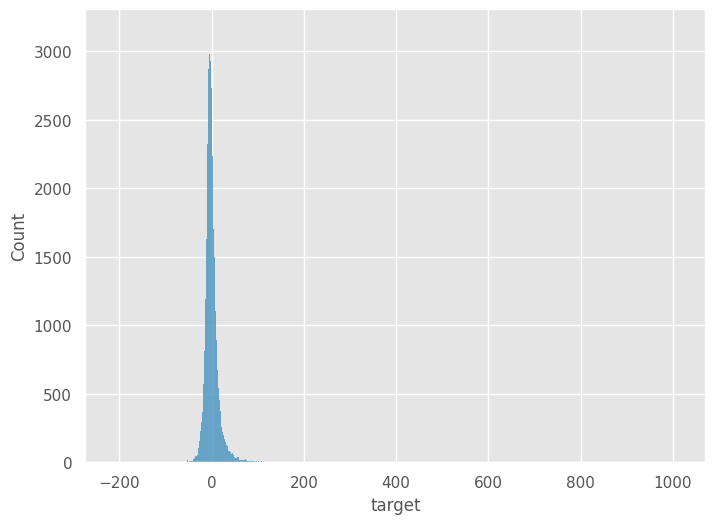

In [ ]:
e = labels_test_series - y_pred

sns.histplot(e)

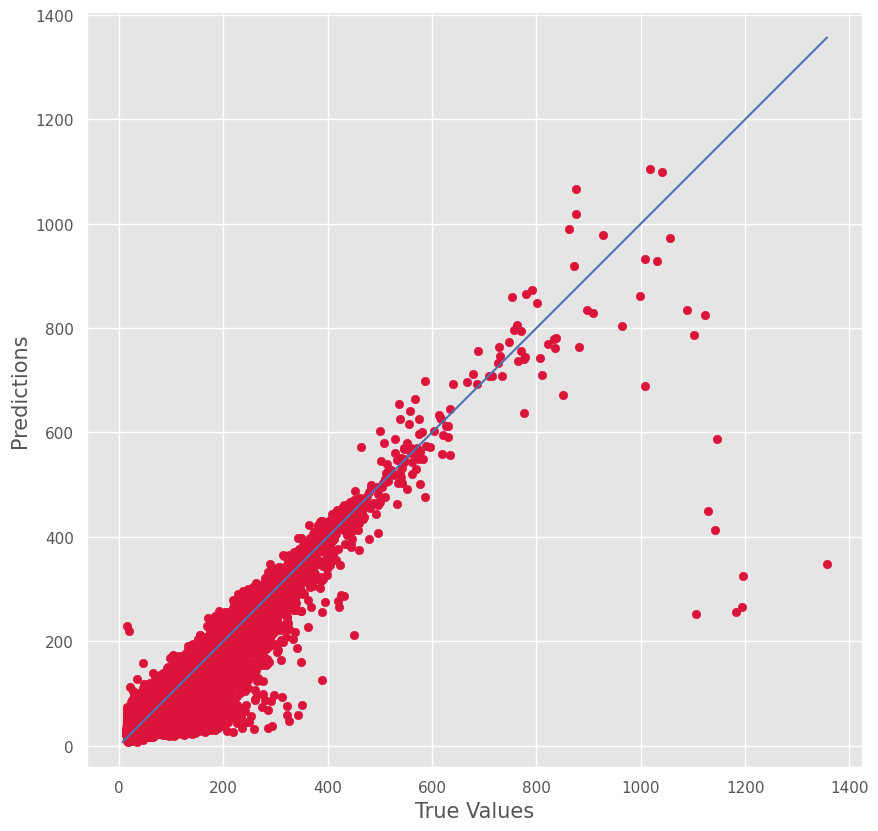

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(labels_test_series, y_pred, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(y_pred), max(labels_test_series))
p2 = min(min(y_pred), min(labels_test_series))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()